In [10]:
import json

def manhattan_distance(x, y):
    return abs(x - 0) + abs(y - 0)

def assign_drones(input_file, output_file):
    # Load input JSON
    with open(input_file, "r") as f:
        data = json.load(f)

    drones = sorted(data["drones"]["fleet"], key=lambda d: (-d["speed"], -d["max_payload"], -d["max_distance"]))  # Prioritize faster drones
    orders = sorted(data["orders"], key=lambda o: o["deadline"])  # Prioritize earlier deadlines
    assignments = []
    for drone in drones:
        if not drone["available"]:
            print(f"Drone {drone['id']} is not available.")
            continue  # Skip unavailable drones

        assigned_orders = []
        total_distance = 0
        remaining_payload = drone["max_payload"]
        remaining_distance = drone["max_distance"]

        for order in orders[:]:  # Copy to allow modification
            order_distance = manhattan_distance(order["delivery_x"], order["delivery_y"])
            round_trip_distance = 2 * order_distance

            # Check constraints
            if (
                order["package_weight"] <= remaining_payload and
                round_trip_distance <= remaining_distance
            ):
                assigned_orders.append(order["id"])
                total_distance += round_trip_distance
                remaining_payload -= order["package_weight"]
                remaining_distance -= round_trip_distance
                orders.remove(order)  # Remove assigned order

        if assigned_orders:
            assignments.append({
                "drone": drone["id"],
                "orders": assigned_orders,
                "total_distance": total_distance
            })

    # Save output JSON
    with open(output_file, "w") as f:
        json.dump({"assignments": assignments}, f, indent=4)

# Example usage
assign_drones(r"C:\Users\m_vivekanandan\OneDrive - INFOTEL CONSEIL\Desktop\madmi\python\sample.json", "output.json")


In [2]:
import json
from itertools import combinations
if __name__ == "__main__":
    with open(r"C:\Users\m_vivekanandan\OneDrive - INFOTEL CONSEIL\Desktop\madmi\python\sample.json", "r") as f:
        data = json.load(f)

In [6]:
data

{'city': {'grid_size': 20},
 'drones': {'fleet': [{'id': 'D1',
    'max_payload': 5,
    'max_distance': 15,
    'speed': 2,
    'available': True},
   {'id': 'D2',
    'max_payload': 10,
    'max_distance': 35,
    'speed': 1.5,
    'available': True},
   {'id': 'D3',
    'max_payload': 3,
    'max_distance': 20,
    'speed': 2.5,
    'available': False}]},
 'orders': [{'id': 'O1',
   'delivery_x': 5,
   'delivery_y': 10,
   'deadline': 15,
   'package_weight': 2},
  {'id': 'O2',
   'delivery_x': 15,
   'delivery_y': 5,
   'deadline': 30,
   'package_weight': 8},
  {'id': 'O3',
   'delivery_x': 12,
   'delivery_y': 8,
   'deadline': 25,
   'package_weight': 4},
  {'id': 'O4',
   'delivery_x': 3,
   'delivery_y': 15,
   'deadline': 40,
   'package_weight': 6}]}

In [12]:
data
drones = sorted([d for d in data["drones"]["fleet"] if d["available"]], key=lambda d: -d["speed"])

In [13]:
drones

[{'id': 'D1',
  'max_payload': 5,
  'max_distance': 15,
  'speed': 2,
  'available': True},
 {'id': 'D2',
  'max_payload': 10,
  'max_distance': 35,
  'speed': 1.5,
  'available': True}]

In [17]:
orders = sorted(data["orders"], key=lambda o: o["deadline"])
orders

[{'id': 'O1',
  'delivery_x': 5,
  'delivery_y': 10,
  'deadline': 15,
  'package_weight': 2},
 {'id': 'O3',
  'delivery_x': 12,
  'delivery_y': 8,
  'deadline': 25,
  'package_weight': 4},
 {'id': 'O2',
  'delivery_x': 15,
  'delivery_y': 5,
  'deadline': 30,
  'package_weight': 8},
 {'id': 'O4',
  'delivery_x': 3,
  'delivery_y': 15,
  'deadline': 40,
  'package_weight': 6}]

In [8]:
import json

def manhattan_distance(x, y):
    return abs(x - 0) + abs(y - 0)

def assign_drones(input_file, output_file):
    # Load input JSON
    with open(input_file, "r") as f:
        data = json.load(f)

    drones = sorted(data["drones"]["fleet"], key=lambda d: (-d["speed"], -d["max_payload"], -d["max_distance"]))  # Prioritize faster drones
    orders = sorted(data["orders"], key=lambda o: -o["delivery_x"])  # Prioritize earlier deadlines
    print(orders)
    print(drones)
    assignments = []
    for drone in drones:
        if not drone["available"]:
            print(f"Drone {drone['id']} is not available.")
            continue  # Skip unavailable drones

        assigned_orders = []
        total_distance = 0
        remaining_payload = drone["max_payload"]
        remaining_distance = drone["max_distance"]

        for order in orders[:]:  # Copy to allow modification
            order_distance = manhattan_distance(order["delivery_x"], order["delivery_y"])
            round_trip_distance = 2 * order_distance

            # Check constraints
            if (
                order["package_weight"] <= remaining_payload and
                round_trip_distance <= remaining_distance
            ):
                assigned_orders.append(order["id"])
                total_distance += round_trip_distance
                remaining_payload -= order["package_weight"]
                remaining_distance -= round_trip_distance
                orders.remove(order)  # Remove assigned order

        if assigned_orders:
            assignments.append({
                "drone": drone["id"],
                "orders": assigned_orders,
                "total_distance": total_distance
            })

    # Save output JSON
    with open(output_file, "w") as f:
        json.dump({"assignments": assignments}, f, indent=4)

# Example usage
assign_drones(r"C:\Users\m_vivekanandan\OneDrive - INFOTEL CONSEIL\Desktop\madmi\python\sample.json", "output.json")


[{'id': 'O4', 'delivery_x': 13, 'delivery_y': 12, 'deadline': 40, 'package_weight': 6}, {'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4}, {'id': 'O2', 'delivery_x': 3, 'delivery_y': 3, 'deadline': 30, 'package_weight': 8}, {'id': 'O1', 'delivery_x': 2, 'delivery_y': 2, 'deadline': 15, 'package_weight': 2}]
[{'id': 'D3', 'max_payload': 7, 'max_distance': 20, 'speed': 2.5, 'available': True}, {'id': 'D1', 'max_payload': 20, 'max_distance': 100, 'speed': 2, 'available': True}, {'id': 'D2', 'max_payload': 25, 'max_distance': 40, 'speed': 1.5, 'available': True}]


In [24]:
# pip install wikipedia

In [23]:
# import wikipedia
# wikipedia.summary("Wikipedia")

In [1]:
import json

def distance(x, y):
    return abs(x - 0) + abs(y - 0)

def assign_drones(input_file, output_file):
    # Load input JSON
    with open(input_file, "r") as f:
        data = json.load(f)

    drones = sorted(data["drones"]["fleet"], key=lambda d: (-d["speed"], -d["max_payload"], -d["max_distance"]))  # Prioritize faster drones
    print(drones)
    orders = sorted(data["orders"], key=lambda o: (o["deadline"]))  # Prioritize earlier deadlines
    print(orders)
    assignments = []
    for drone in drones:
        if not drone["available"]:
            print(f"Drone {drone['id']} is not available.")
            continue  # Skip unavailable drones

        assigned_orders = []
        total_distance = 0
        remaining_payload = drone["max_payload"]
        remaining_distance = drone["max_distance"]

        for order in orders[:]:  # Copy to allow modification
            order_distance = distance(order["delivery_x"], order["delivery_y"])
            round_trip_distance = 2 * order_distance

            # Check constraints
            if (
                order["package_weight"] <= remaining_payload and
                round_trip_distance <= remaining_distance
            ):
                assigned_orders.append(order["id"])
                total_distance += round_trip_distance
                remaining_payload -= order["package_weight"]
                remaining_distance -= round_trip_distance
                orders.remove(order)  # Remove assigned order

        if assigned_orders:
            assignments.append({
                "drone": drone["id"],
                "orders": assigned_orders,
                "total_distance": total_distance
            })

    # Save output JSON
    with open(output_file, "w") as f:
        json.dump({"assignments": assignments}, f, indent=4)

# Example usage
assign_drones(r"sample.json", "output.json")

[{'id': 'D3', 'max_payload': 7, 'max_distance': 50, 'speed': 2.5, 'available': True}, {'id': 'D1', 'max_payload': 20, 'max_distance': 100, 'speed': 2, 'available': True}, {'id': 'D2', 'max_payload': 25, 'max_distance': 40, 'speed': 1.5, 'available': True}]
[{'id': 'O1', 'delivery_x': 2, 'delivery_y': 2, 'deadline': 15, 'package_weight': 2}, {'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4}, {'id': 'O2', 'delivery_x': 3, 'delivery_y': 3, 'deadline': 30, 'package_weight': 8}, {'id': 'O4', 'delivery_x': 13, 'delivery_y': 12, 'deadline': 40, 'package_weight': 6}]


In [7]:
import json
with open('sample.json', "r") as f:
    data = json.load(f)

In [8]:
drones = sorted(data["drones"]["fleet"], key=lambda d: (-d["speed"], -d["max_payload"], -d["max_distance"]))  # Prioritize faster drones
for i in drones:
    print(i)

{'id': 'D3', 'max_payload': 7, 'max_distance': 50, 'speed': 2.5, 'available': True}
{'id': 'D1', 'max_payload': 20, 'max_distance': 100, 'speed': 2, 'available': True}
{'id': 'D2', 'max_payload': 25, 'max_distance': 40, 'speed': 1.5, 'available': True}


In [9]:
orders = sorted(data["orders"], key=lambda o: (-(o["delivery_x"]+o["delivery_y"])))  # Prioritize earlier deadlines
for i in orders:
    print(i)

{'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4}
{'id': 'O2', 'delivery_x': 3, 'delivery_y': 3, 'deadline': 30, 'package_weight': 8}
{'id': 'O1', 'delivery_x': 2, 'delivery_y': 2, 'deadline': 15, 'package_weight': 2}
{'id': 'O4', 'delivery_x': -2, 'delivery_y': -2, 'deadline': 40, 'package_weight': 6}


In [10]:
# orders = sorted(data["orders"], key=lambda o: (-(o["delivery_x"]+o["delivery_y"])))  # Prioritize earlier deadlines
# assignments = []
# for drone in drones:
#     if not drone["available"]:
#         print(f"Drone {drone['id']} is not available.")
#         continue  # Skip unavailable drones
#     assigned_orders = []
#     total_distance = 0
#     remaining_payload = drone["max_payload"]
#     print("remaining_payload", drone["max_payload"])
#     remaining_distance = drone["max_distance"]
#     print("remaining_distance", drone["max_distance"])
#     for order in orders[:]:  # Copy to allow modification
#         print(order)
#         order_distance = distance(order["delivery_x"], order["delivery_y"] ,z,a)
#         round_trip_distance = 2 * order_distance
#         print("round_trip_distance", round_trip_distance)

#         # Check constraints
#         if (
#             order["package_weight"] <= remaining_payload and
#             round_trip_distance <= remaining_distance
#         ):
#             assigned_orders.append(order["id"])
#             total_distance += round_trip_distance
#             remaining_payload -= order["package_weight"]
#             remaining_distance -= round_trip_distance
#             orders.remove(order)  # Remove assigned order
#     if assigned_orders:
#         assignments.append({
#             "drone": drone["id"],
#             "orders": assigned_orders,
#             "total_distance": total_distance
#         })
# print(assignments)

In [11]:
def distance(x, y,z,a):
    return abs(x - 0) + abs(y - 0)

orders = sorted(data["orders"], key=lambda o: (-(o["delivery_x"]+o["delivery_y"])))  # Prioritize earlier deadlines
#for i in orders:
#    print(i)
assignments = []
for drone in drones:
    print(drone)
    if not drone["available"]:
        print(f"Drone {drone['id']} is not available.")
        continue  # Skip unavailable drones
    assigned_orders = []
    total_distance = 0
    remaining_payload = drone["max_payload"]
    print("remaining_payload", drone["max_payload"])
    remaining_distance = drone["max_distance"]
    print("remaining_distance", drone["max_distance"])
    z=a=0
    for order in orders[:]:  # Copy to allow modification
        print(order)
        print("HI")
        order_distance = distance(order["delivery_x"], order["delivery_y"] , z, a)
        round_trip_distance = 2 * order_distance
        print("round_trip_distance", round_trip_distance)

        # Check constraints
        if (
            order["package_weight"] <= remaining_payload and
            round_trip_distance <= remaining_distance 
        ):
            assigned_orders.append(order["id"])
            print("assigned_orders", assigned_orders)
            if total_distance == 0:
                total_distance += round_trip_distance
                print("total_distance", total_distance)
            remaining_payload -= order["package_weight"]
            print("remaining_payload", remaining_payload)
            remaining_distance -= round_trip_distance
            print("remaining_distance", remaining_distance)
            orders.remove(order)  # Remove assigned order
    if assigned_orders:
        assignments.append({
            "drone": drone["id"],
            "orders": assigned_orders,
            "total_distance": total_distance
        })

print(assignments)

{'id': 'D3', 'max_payload': 7, 'max_distance': 50, 'speed': 2.5, 'available': True}
remaining_payload 7
remaining_distance 50
{'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4}
HI
round_trip_distance 16
assigned_orders ['O3']
total_distance 16
remaining_payload 3
remaining_distance 34
{'id': 'O2', 'delivery_x': 3, 'delivery_y': 3, 'deadline': 30, 'package_weight': 8}
HI
round_trip_distance 12
{'id': 'O1', 'delivery_x': 2, 'delivery_y': 2, 'deadline': 15, 'package_weight': 2}
HI
round_trip_distance 8
assigned_orders ['O3', 'O1']
remaining_payload 1
remaining_distance 26
{'id': 'O4', 'delivery_x': -2, 'delivery_y': -2, 'deadline': 40, 'package_weight': 6}
HI
round_trip_distance 8
{'id': 'D1', 'max_payload': 20, 'max_distance': 100, 'speed': 2, 'available': True}
remaining_payload 20
remaining_distance 100
{'id': 'O2', 'delivery_x': 3, 'delivery_y': 3, 'deadline': 30, 'package_weight': 8}
HI
round_trip_distance 12
assigned_orders ['O2']
total_distance 12
r

[{'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4}, {'id': 'O2', 'delivery_x': 3, 'delivery_y': -3, 'deadline': 30, 'package_weight': 8}, {'id': 'O4', 'delivery_x': -3, 'delivery_y': -2, 'deadline': 40, 'package_weight': 6}, {'id': 'O1', 'delivery_x': -2, 'delivery_y': 2, 'deadline': 15, 'package_weight': 2}]


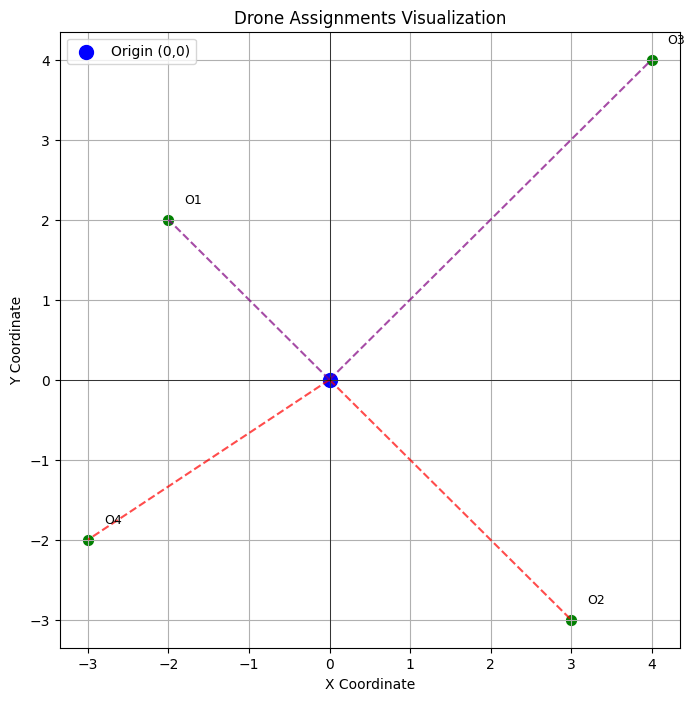

In [9]:
import json  # Importing the JSON module to handle reading and writing JSON files
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
# Function to calculate distance from origin (0, 0) to (x, y)
def distance(x, y):
    return abs(x - 0) + abs(y - 0)  # Sum of the absolute differences in x and y coordinates

def visualize_assignments(assignments, orders_data):
    plt.figure(figsize=(8, 8))
    plt.title("Drone Assignments Visualization")

    # Draw origin
    plt.scatter(0, 0, color='blue', s=100, label='Origin (0,0)')

    # Prepare order points
    order_points = {order['id']: (order['delivery_x'], order['delivery_y']) for order in orders_data}

    # Plot orders
    for order_id, (x, y) in order_points.items():
        plt.scatter(x, y, color='green', s=50)
        plt.text(x + 0.2, y + 0.2, order_id, fontsize=9)

    # Draw lines from origin to assigned orders
    colors = ['red', 'purple', 'orange', 'cyan', 'magenta', 'brown']
    for idx, assignment in enumerate(assignments):
        color = colors[idx % len(colors)]
        for order_id in assignment['orders']:
            x, y = order_points[order_id]
            plt.plot([0, x], [0, y], linestyle='--', color=color, alpha=0.7)

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.savefig("assignments_visualization.png")
    plt.show()
# Main function to assign drones to orders
def assign_drones(input_file, output_file):
    # Load input JSON data from the given file
    with open(input_file, "r") as f:
        data = json.load(f)

    # Sort drones based on priority: speed (descending), then max_payload (descending), then max_distance (descending)
    drones = sorted(data["drones"]["fleet"], key=lambda d: (-d["speed"], -d["max_payload"], -d["max_distance"]))

    # Sort orders based on delivery coordinates (sum of x and y), to prioritize farther orders
    orders = sorted(data["orders"], key=lambda o: -distance(o["delivery_x"],o["delivery_y"]))
    print(orders)
    assignments = []  # List to store the final drone-to-order assignments

    # Iterate over each drone
    for drone in drones:
        if not drone["available"]:
            continue  # Skip drones that are not available

        assigned_orders = []  # List to store orders assigned to the current drone
        total_distance = 0  # Total distance drone will travel
        remaining_payload = drone["max_payload"]  # Initialize drone's payload capacity
        remaining_distance = drone["max_distance"]  # Initialize drone's travel distance capacity

        # Iterate over a copy of orders list, so we can modify the original list safely
        for order in orders[:]:
            order_distance = distance(order["delivery_x"], order["delivery_y"])  # Calculate distance to order
            round_trip_distance = 2 * order_distance  # Round-trip distance to deliver the order

            # Check if drone can carry this order and make the round trip
            if (
                order["package_weight"] <= remaining_payload and
                round_trip_distance <= remaining_distance
            ):
                assigned_orders.append(order["id"])  # Assign order to the drone
                if total_distance == 0:
                    total_distance += round_trip_distance  # Add the distance only once during the first assignment, as the orders are sorted in descending order by their distance from the origin.
                remaining_payload -= order["package_weight"]  # Update remaining payload capacity
                remaining_distance -= round_trip_distance  # Update remaining travel distance
                orders.remove(order)  # Remove the order from the available orders list

        # If any orders were assigned to the drone, record the assignment
        if assigned_orders:
            assignments.append({
                "drone": drone["id"],  # Drone ID
                "orders": assigned_orders,  # List of order IDs assigned to this drone
                "total_distance": total_distance  # Total distance travelled by this drone
            })

    # Sort the assignments list by drone ID for cleaner output
    assignments = sorted(assignments, key=lambda x: x["drone"])
    visualize_assignments(assignments, data["orders"])
    # Save the assignments to the output JSON file
    with open(output_file, "w") as f:
        json.dump({"assignments": assignments}, f, indent=4)

# Example usage of the function with input and output file paths
assign_drones(r"sample.json", "output.json")

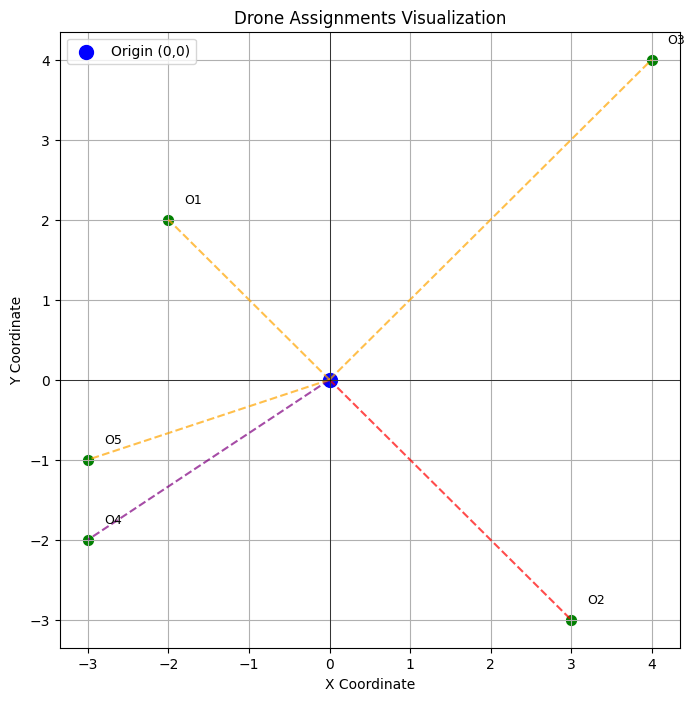

In [110]:
import json  # Importing the JSON module to handle reading and writing JSON files
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from itertools import groupby
import math
# Function to calculate distance from origin (0, 0) to (x, y)
def distance(x, y):
    return abs(x - 0) + abs(y - 0)  # Sum of the absolute differences in x and y coordinates
def distance_points(x1, y1, x2, y2):
    return abs(x2 - x1) + abs(y2 - y1)  # Sum of the absolute differences in x and y coordinates
def visualize_assignments(assignments, orders_data):
    plt.figure(figsize=(8, 8))
    plt.title("Drone Assignments Visualization")

    # Draw origin
    plt.scatter(0, 0, color='blue', s=100, label='Origin (0,0)')

    # Prepare order points
    order_points = {order['id']: (order['delivery_x'], order['delivery_y']) for order in orders_data}

    # Plot orders
    for order_id, (x, y) in order_points.items():
        plt.scatter(x, y, color='green', s=50)
        plt.text(x + 0.2, y + 0.2, order_id, fontsize=9)

    # Draw lines from origin to assigned orders
    colors = ['red', 'purple', 'orange', 'cyan', 'magenta', 'brown']
    for idx, assignment in enumerate(assignments):
        color = colors[idx % len(colors)]
        for order_id in assignment['orders']:
            x, y = order_points[order_id]
            plt.plot([0, x], [0, y], linestyle='--', color=color, alpha=0.7)

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.savefig("assignments_visualization.png")
    plt.show()

def quadrant(order):
    if order["delivery_x"] > 0 and order["delivery_y"] > 0:
        order["quadrant"] = 1
    elif order["delivery_x"] > 0 and order["delivery_y"] < 0:
        order["quadrant"] = 2
    elif order["delivery_x"] < 0 and order["delivery_y"] < 0:
        order["quadrant"] = 3
    elif order["delivery_x"] < 0 and order["delivery_y"] > 0:
        order["quadrant"] = 4

# Main function to assign drones to orders
def assign_drones(input_file, output_file):
    # Load input JSON data from the given file
    with open(input_file, "r") as f:
        data = json.load(f)
   
    # Sort drones based on priority: speed (descending), then max_payload (descending), then max_distance (descending)
    drones = sorted(data["drones"]["fleet"], key=lambda d: (-d["speed"], -d["max_payload"], -d["max_distance"]))

    #for i in data["orders"]:
    #    quadrant(i)
    # Sort orders based on delivery coordinates (sum of x and y), to prioritize farther orders
    #order=[]
    # First, sort by quadrant to prepare for groupby
    # orders_sorted = sorted(data["orders"], key=lambda o: -distance(o["delivery_x"], o["delivery_y"]))

    # Then, group and sort within each group
    #for quad, group in groupby(orders_sorted, key=lambda o: o["quadrant"]):
    #    group_orders = sorted(group, key=lambda o: -distance(o["delivery_x"], o["delivery_y"]))
    #    order.append(group_orders)
    #    print(group_orders)
    #flattened = [order for group in order for order in group]    
    assignments = []  # List to store the final drone-to-order assignments
    #flattened=orders_sorted
    # Iterate over each drone
    for drone in drones:
        if not drone["available"]:
            continue  # Skip drones that are not available

        assigned_orders = []  # List to store orders assigned to the current drone
        total_distance = 0  # Total distance drone will travel
        remaining_payload = drone["max_payload"]  # Initialize drone's payload capacity
        remaining_distance = drone["max_distance"]  # Initialize drone's travel distance capacity
        x_cordinate = 0
        y_cordinate = 0
        if assignments == []:
            orders_sorted = sorted(data["orders"], key=lambda o: -distance(o["delivery_x"], o["delivery_y"]))
        else:
            orders_sorted = sorted(flattened, key=lambda o: -distance(o["delivery_x"], o["delivery_y"]))
        flattened=orders_sorted
        # Iterate over a copy of orders list, so we can modify the original list safely
        for order in flattened:
            order_distance = distance_points(x_cordinate,y_cordinate,order["delivery_x"], order["delivery_y"])  # Calculate distance to order
            round_trip_distance = order_distance  # Round-trip distance to deliver the order

            # Check if drone can carry this order and make the round trip
            if (order["package_weight"] <= remaining_payload and round_trip_distance <= remaining_distance):
                assigned_orders.append(order["id"])  # Assign order to the drone
                #if total_distance == 0:
                total_distance += round_trip_distance  # Add the distance only once during the first assignment, as the orders are sorted in descending order by their distance from the origin.
                remaining_payload -= order["package_weight"]  # Update remaining payload capacity
                remaining_distance -= round_trip_distance  # Update remaining travel distance
                x_cordinate = order["delivery_x"]
                y_cordinate = order["delivery_y"]
                flattened.remove(order)
                flattened = sorted(flattened, key=lambda o: (distance_points(x_cordinate,y_cordinate,o["delivery_x"],o["delivery_y"])))
                # Remove the order from the available orders list
            else:
                total_distance += distance_points(order["delivery_x"], order["delivery_y"],0,0)
        # If any orders were assigned to the drone, record the assignment
        if assigned_orders:
            assignments.append({
                "drone": drone["id"],  # Drone ID
                "orders": assigned_orders,  # List of order IDs assigned to this drone
                "total_distance": total_distance  # Total distance travelled by this drone
            })

    # Sort the assignments list by drone ID for cleaner output
    assignments = sorted(assignments, key=lambda x: x["drone"])
    visualize_assignments(assignments, data["orders"])
    # Save the assignments to the output JSON file
    with open(output_file, "w") as f:
        json.dump({"assignments": assignments}, f, indent=4)

# Example usage of the function with input and output file paths
assign_drones(r"sample.json", "output.json")

In [29]:
with open("sample.json", "r") as f:
        data = json.load(f)
def quadrant(order):
    if order["delivery_x"] > 0 and order["delivery_y"] > 0:
        order["quadrant"] = 1
    elif order["delivery_x"] > 0 and order["delivery_y"] < 0:
        order["quadrant"] = 2
    elif order["delivery_x"] < 0 and order["delivery_y"] < 0:
        order["quadrant"] = 3
    elif order["delivery_x"] < 0 and order["delivery_y"] > 0:
        order["quadrant"] = 4
for i in data['orders']:
    quadrant(i)
print(data)
a=data['orders']

{'city': {'grid_size': 20}, 'drones': {'fleet': [{'id': 'D1', 'max_payload': 20, 'max_distance': 100, 'speed': 2, 'available': True}, {'id': 'D2', 'max_payload': 25, 'max_distance': 40, 'speed': 1.5, 'available': True}, {'id': 'D3', 'max_payload': 7, 'max_distance': 50, 'speed': 2.5, 'available': True}]}, 'orders': [{'id': 'O1', 'delivery_x': -2, 'delivery_y': 2, 'deadline': 15, 'package_weight': 2, 'quadrant': 4}, {'id': 'O2', 'delivery_x': 3, 'delivery_y': -3, 'deadline': 30, 'package_weight': 8, 'quadrant': 2}, {'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4, 'quadrant': 1}, {'id': 'O4', 'delivery_x': -3, 'delivery_y': -2, 'deadline': 40, 'package_weight': 6, 'quadrant': 3}, {'id': 'O5', 'delivery_x': -3, 'delivery_y': -1, 'deadline': 40, 'package_weight': 1, 'quadrant': 3}]}


In [36]:
from itertools import groupby
order=[]
# First, sort by quadrant to prepare for groupby
orders_sorted = sorted(a, key=lambda o: o["quadrant"])

# Then, group and sort within each group
for quadrant, group in groupby(orders_sorted, key=lambda o: o["quadrant"]):
    group_orders = sorted(group, key=lambda o: -distance(o["delivery_x"], o["delivery_y"]))
    order.append(group_orders)
    print(group_orders)

[{'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4, 'quadrant': 1}]
[{'id': 'O2', 'delivery_x': 3, 'delivery_y': -3, 'deadline': 30, 'package_weight': 8, 'quadrant': 2}]
[{'id': 'O4', 'delivery_x': -3, 'delivery_y': -2, 'deadline': 40, 'package_weight': 6, 'quadrant': 3}, {'id': 'O5', 'delivery_x': -3, 'delivery_y': -1, 'deadline': 40, 'package_weight': 1, 'quadrant': 3}]
[{'id': 'O1', 'delivery_x': -2, 'delivery_y': 2, 'deadline': 15, 'package_weight': 2, 'quadrant': 4}]


In [48]:
flattened = [order for group in order for order in group]
print(flattened)

[{'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4, 'quadrant': 1}, {'id': 'O2', 'delivery_x': 3, 'delivery_y': -3, 'deadline': 30, 'package_weight': 8, 'quadrant': 2}, {'id': 'O4', 'delivery_x': -3, 'delivery_y': -2, 'deadline': 40, 'package_weight': 6, 'quadrant': 3}, {'id': 'O5', 'delivery_x': -3, 'delivery_y': -1, 'deadline': 40, 'package_weight': 1, 'quadrant': 3}, {'id': 'O1', 'delivery_x': -2, 'delivery_y': 2, 'deadline': 15, 'package_weight': 2, 'quadrant': 4}]


In [49]:
for i in flattened:
    print(i)

{'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4, 'quadrant': 1}
{'id': 'O2', 'delivery_x': 3, 'delivery_y': -3, 'deadline': 30, 'package_weight': 8, 'quadrant': 2}
{'id': 'O4', 'delivery_x': -3, 'delivery_y': -2, 'deadline': 40, 'package_weight': 6, 'quadrant': 3}
{'id': 'O5', 'delivery_x': -3, 'delivery_y': -1, 'deadline': 40, 'package_weight': 1, 'quadrant': 3}
{'id': 'O1', 'delivery_x': -2, 'delivery_y': 2, 'deadline': 15, 'package_weight': 2, 'quadrant': 4}


In [66]:
a = [1, 2, 3, 4, 5, 6]
for i in a:  # Iterate over a copy of the list to avoid modifying it during iteration
    if 5 in a:  # Check if 5 exists in the list
        a.remove(5)
    print(a)

[1, 2, 3, 4, 6]
[1, 2, 3, 4, 6]
[1, 2, 3, 4, 6]
[1, 2, 3, 4, 6]
[1, 2, 3, 4, 6]


In [75]:
# Assign the list to a new variable instead of using `f`
f_list = [{'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4, 'quadrant': 1},{'id': 'O4', 'delivery_x': 5, 'delivery_y': 5, 'deadline': 30, 'package_weight': 5, 'quadrant': 1}]
f={'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4, 'quadrant': 1}
for i in f:
    print(i)

id
delivery_x
delivery_y
deadline
package_weight
quadrant


In [81]:
with open("output.json", "r") as f:
        output = json.load(f)

In [82]:
output

{'assignments': [{'drone': 'D1', 'orders': ['O2'], 'total_distance': 12},
  {'drone': 'D2', 'orders': ['O4'], 'total_distance': 10},
  {'drone': 'D3', 'orders': ['O3', 'O1', 'O5'], 'total_distance': 16}]}

In [103]:
s=[{'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4}, {'id': 'O2', 'delivery_x': 3, 'delivery_y': -3, 'deadline': 30, 'package_weight': 8}, {'id': 'O4', 'delivery_x': -3, 'delivery_y': -2, 'deadline': 40, 'package_weight': 6}, {'id': 'O1', 'delivery_x': -2, 'delivery_y': 2, 'deadline': 15, 'package_weight': 2}, {'id': 'O5', 'delivery_x': -3, 'delivery_y': -1, 'deadline': 40, 'package_weight': 1}]
x_cordinate = 4
y_cordinate = 4
flattened = sorted(s, key=lambda o: (distance_points(x_cordinate,y_cordinate,o["delivery_x"],o["delivery_y"])))
print(flattened)

[{'id': 'O3', 'delivery_x': 4, 'delivery_y': 4, 'deadline': 25, 'package_weight': 4}, {'id': 'O2', 'delivery_x': 3, 'delivery_y': -3, 'deadline': 30, 'package_weight': 8}, {'id': 'O1', 'delivery_x': -2, 'delivery_y': 2, 'deadline': 15, 'package_weight': 2}, {'id': 'O5', 'delivery_x': -3, 'delivery_y': -1, 'deadline': 40, 'package_weight': 1}, {'id': 'O4', 'delivery_x': -3, 'delivery_y': -2, 'deadline': 40, 'package_weight': 6}]


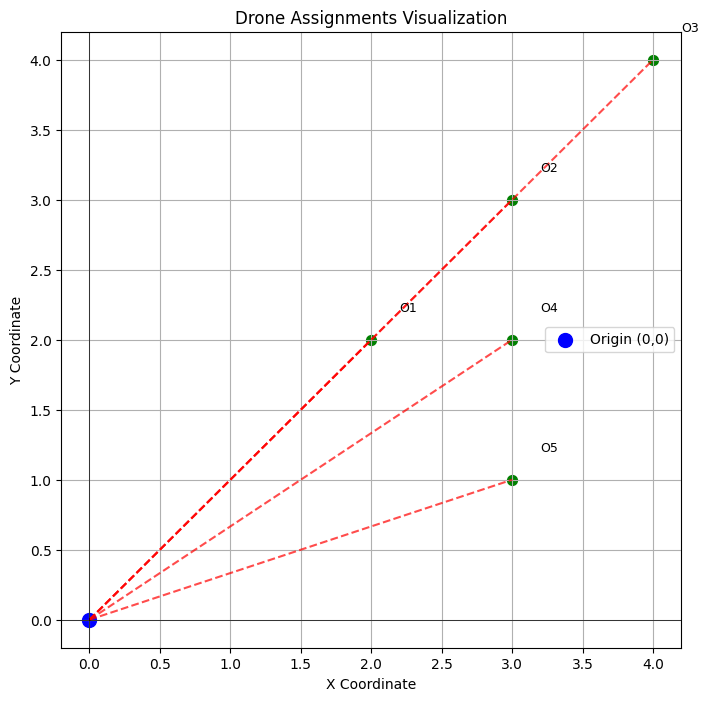

In [125]:
import json
import matplotlib.pyplot as plt
from itertools import groupby

# Function to calculate Manhattan distance from (0,0)
def distance(x, y):
    return abs(x) + abs(y)

# Function to calculate Manhattan distance between two points
def distance_points(x1, y1, x2, y2):
    return abs(x2 - x1) + abs(y2 - y1)

# Visualization function
def visualize_assignments(assignments, orders_data):
    plt.figure(figsize=(8, 8))
    plt.title("Drone Assignments Visualization")

    # Draw origin
    plt.scatter(0, 0, color='blue', s=100, label='Origin (0,0)')

    # Prepare order points
    order_points = {order['id']: (order['delivery_x'], order['delivery_y']) for order in orders_data}

    # Plot orders
    for order_id, (x, y) in order_points.items():
        plt.scatter(x, y, color='green', s=50)
        plt.text(x + 0.2, y + 0.2, order_id, fontsize=9)

    # Draw lines from origin to assigned orders
    colors = ['red', 'purple', 'orange', 'cyan', 'magenta', 'brown']
    for idx, assignment in enumerate(assignments):
        color = colors[idx % len(colors)]
        for order_id in assignment['orders']:
            x, y = order_points[order_id]
            plt.plot([0, x], [0, y], linestyle='--', color=color, alpha=0.7)

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.savefig("assignments_visualization.png")
    plt.show()

# Main assignment function
def assign_drones(input_file, output_file):
    with open(input_file, "r") as f:
        data = json.load(f)

    drones = sorted(data["drones"]["fleet"], key=lambda d: (-d["speed"], -d["max_payload"], -d["max_distance"]))

    assignments = []
    for drone in drones:
        if not drone["available"]:
            continue
        
        assigned_orders = []
        total_distance = 0
        remaining_payload = drone["max_payload"]
        remaining_distance = drone["max_distance"]
        x_cordinate, y_cordinate = 0, 0

        if not assignments:
            orders_sorted = sorted(data["orders"], key=lambda o: -distance(o["delivery_x"], o["delivery_y"]))
        else:
            orders_sorted = sorted(flattened, key=lambda o: -distance(o["delivery_x"], o["delivery_y"]))

        flattened = orders_sorted

        for order in flattened[:]:  # Copy of list for safe removal
            order_distance = distance_points(x_cordinate, y_cordinate, order["delivery_x"], order["delivery_y"])
            if (order["package_weight"] <= remaining_payload and order_distance <= remaining_distance):
                assigned_orders.append(order["id"])
                total_distance += (order_distance*2)  # Round trip distance
                remaining_payload -= order["package_weight"]
                remaining_distance -= order_distance
                x_cordinate, y_cordinate = order["delivery_x"], order["delivery_y"]
                flattened.remove(order)

                # Sort remaining orders based on proximity to current position
                flattened = sorted(flattened, key=lambda o: distance_points(x_cordinate, y_cordinate, o["delivery_x"], o["delivery_y"]))
            elif order == flattened[-1]:
                total_distance += distance_points(order["delivery_x"], order["delivery_y"], 0, 0)

        if assigned_orders:
            assignments.append({
                "drone_id": drone["id"],
                "orders": assigned_orders,
                "total_distance": total_distance
            })

    # Write results to output file
    with open(output_file, "w") as f:
        json.dump(assignments, f, indent=4)

    # Call the visualization function
    visualize_assignments(assignments, data["orders"])

# Example usage
assign_drones("sample.json", "output.json")


In [124]:
import json
import matplotlib.pyplot as plt
from itertools import groupby

# Function to calculate Manhattan distance from (0,0)
def distance(x, y):
    return abs(x) + abs(y)

# Function to calculate Manhattan distance between two points
def distance_points(x1, y1, x2, y2):
    return abs(x2 - x1) + abs(y2 - y1)

# Main assignment function
def assign_drones(input_file, output_file):
    with open(input_file, "r") as f:
        data = json.load(f)

    drones = sorted(data["drones"]["fleet"], key=lambda d: (-d["speed"], -d["max_payload"], -d["max_distance"]))

    assignments = []
    for drone in drones:
        if not drone["available"]:
            continue

        assigned_orders = []
        total_distance = 0
        remaining_payload = drone["max_payload"]
        remaining_distance = drone["max_distance"]
        x_cordinate, y_cordinate = 0, 0

        if not assignments:
            orders_sorted = sorted(data["orders"], key=lambda o: -distance(o["delivery_x"], o["delivery_y"]))
        else:
            orders_sorted = sorted(flattened, key=lambda o: -distance(o["delivery_x"], o["delivery_y"]))

        flattened = orders_sorted

        for order in flattened[:]:  # Copy of list for safe removal
            order_distance = distance_points(x_cordinate, y_cordinate, order["delivery_x"], order["delivery_y"])
            if (order["package_weight"] <= remaining_payload and order_distance <= remaining_distance):
                assigned_orders.append(order["id"])
                total_distance += (order_distance*2)  # Round trip distance
                remaining_payload -= order["package_weight"]
                remaining_distance -= order_distance
                x_cordinate, y_cordinate = order["delivery_x"], order["delivery_y"]
                flattened.remove(order)

                # Sort remaining orders based on proximity to current position
                flattened = sorted(flattened, key=lambda o: distance_points(x_cordinate, y_cordinate, o["delivery_x"], o["delivery_y"]))
            elif order == flattened[-1]:
                total_distance += distance_points(order["delivery_x"], order["delivery_y"], 0, 0)

        if assigned_orders:
            assignments.append({
                "drone_id": drone["id"],
                "orders": assigned_orders,
                "total_distance": total_distance
            })

    # Write results to output file
    with open(output_file, "w") as f:
        json.dump(assignments, f, indent=4)

# Example usage
assign_drones("sample.json", "output.json")